In [1]:
# We want to compare diff delta_ts for the same computational cost
# Computational cost = num of measurements / delta_t
# we have directories with different number of measurements
# and each of these directories has a json file with the following mapping - delta_t -> error
# We want to plot error vs delta_t for the same computational cost

# we want to first create a mapping of computational cost -> (num of measurements, delta_t, error)
# then we want to plot error vs delta_t for each computational cost

import os
import json
import matplotlib.pyplot as plt
import numpy as np

computational_cost_to_data = {}
for root, dirs, files in os.walk('.'):
    for dir in dirs:
        if dir.startswith('M'):
            for file in os.listdir(os.path.join(root, dir)):
                if file.endswith('.json'):
                    with open(os.path.join(root, dir, file), 'r') as f:
                        data = json.load(f)
                        for delta_t, error in data.items():
                            num_measurements = int(dir.split('=')[1])
                            computational_cost = num_measurements / float(delta_t)
                            if computational_cost not in computational_cost_to_data:
                                computational_cost_to_data[computational_cost] = []
                            computational_cost_to_data[computational_cost].append((num_measurements, float(delta_t), error))

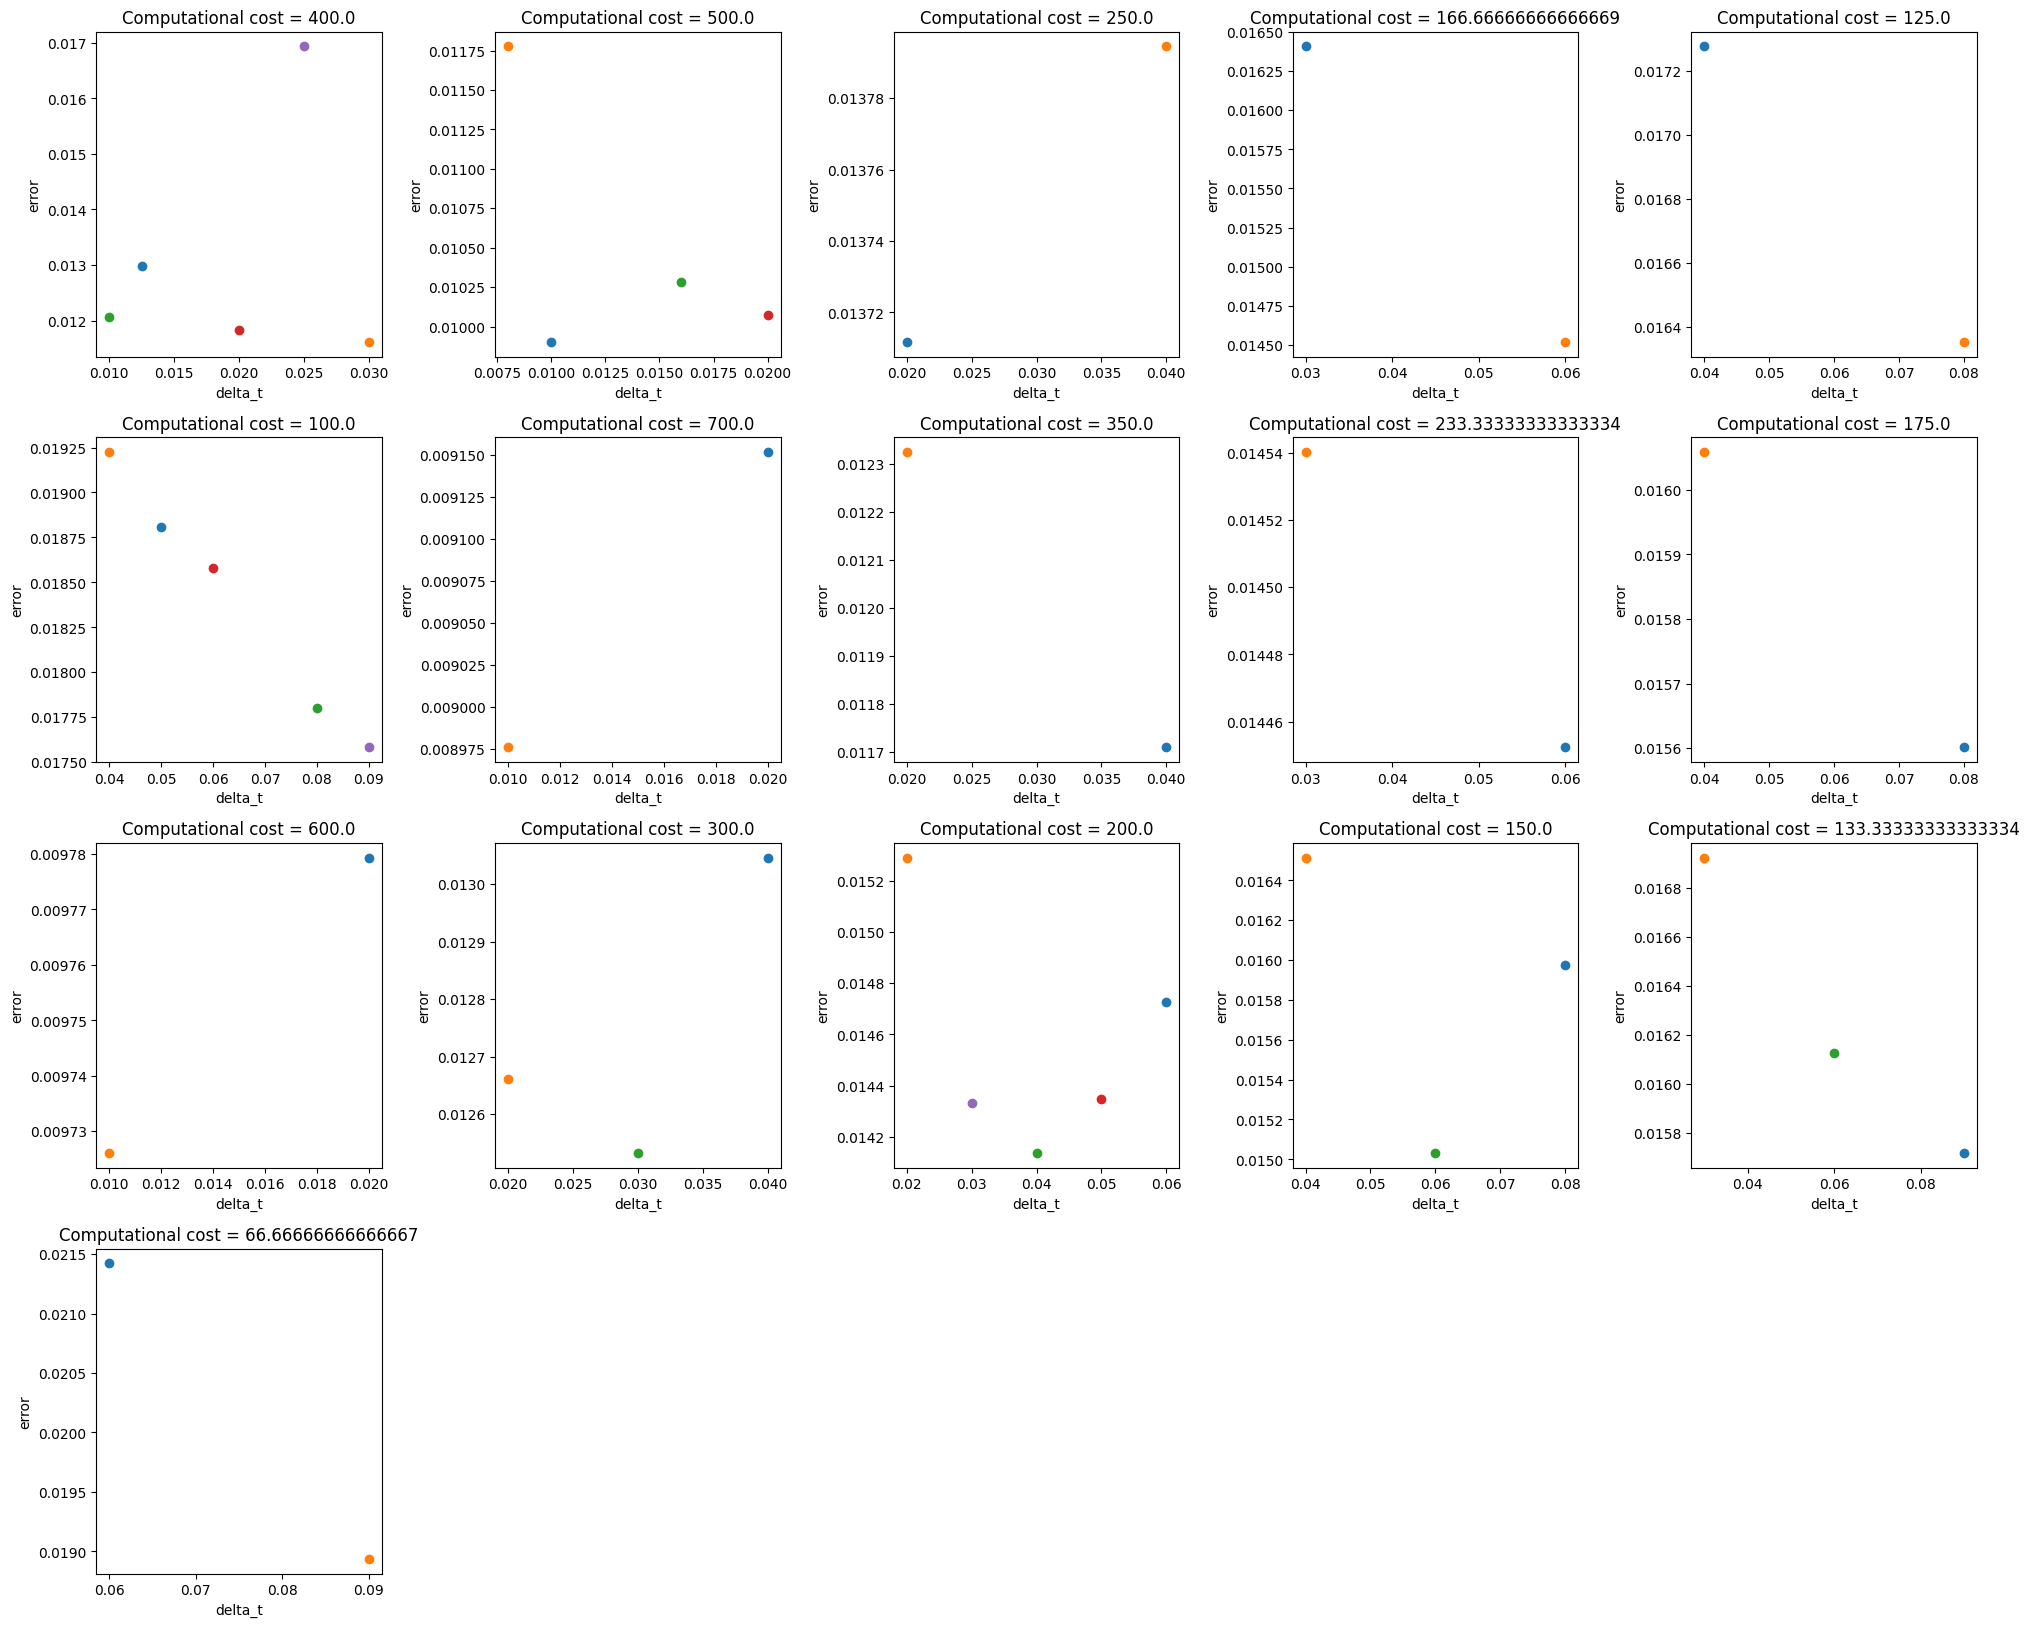

In [2]:
# Assuming computational_cost_to_data is a dictionary with the data
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axs array for easy iteration
axs = axs.flatten()

idx = 0
for computational_cost, data in computational_cost_to_data.items():
    if idx >= rows * cols:
        break  # Stop if we have more data than subplots
    if len(data) < 2:
        continue
    for num_measurements, delta_t, error in data:
        axs[idx].scatter(delta_t, error)
    axs[idx].set_xlabel('delta_t')
    axs[idx].set_ylabel('error')
    axs[idx].set_title('Computational cost = {}'.format(computational_cost))

    idx += 1

# Hide any unused subplots
for i in range(idx, rows * cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

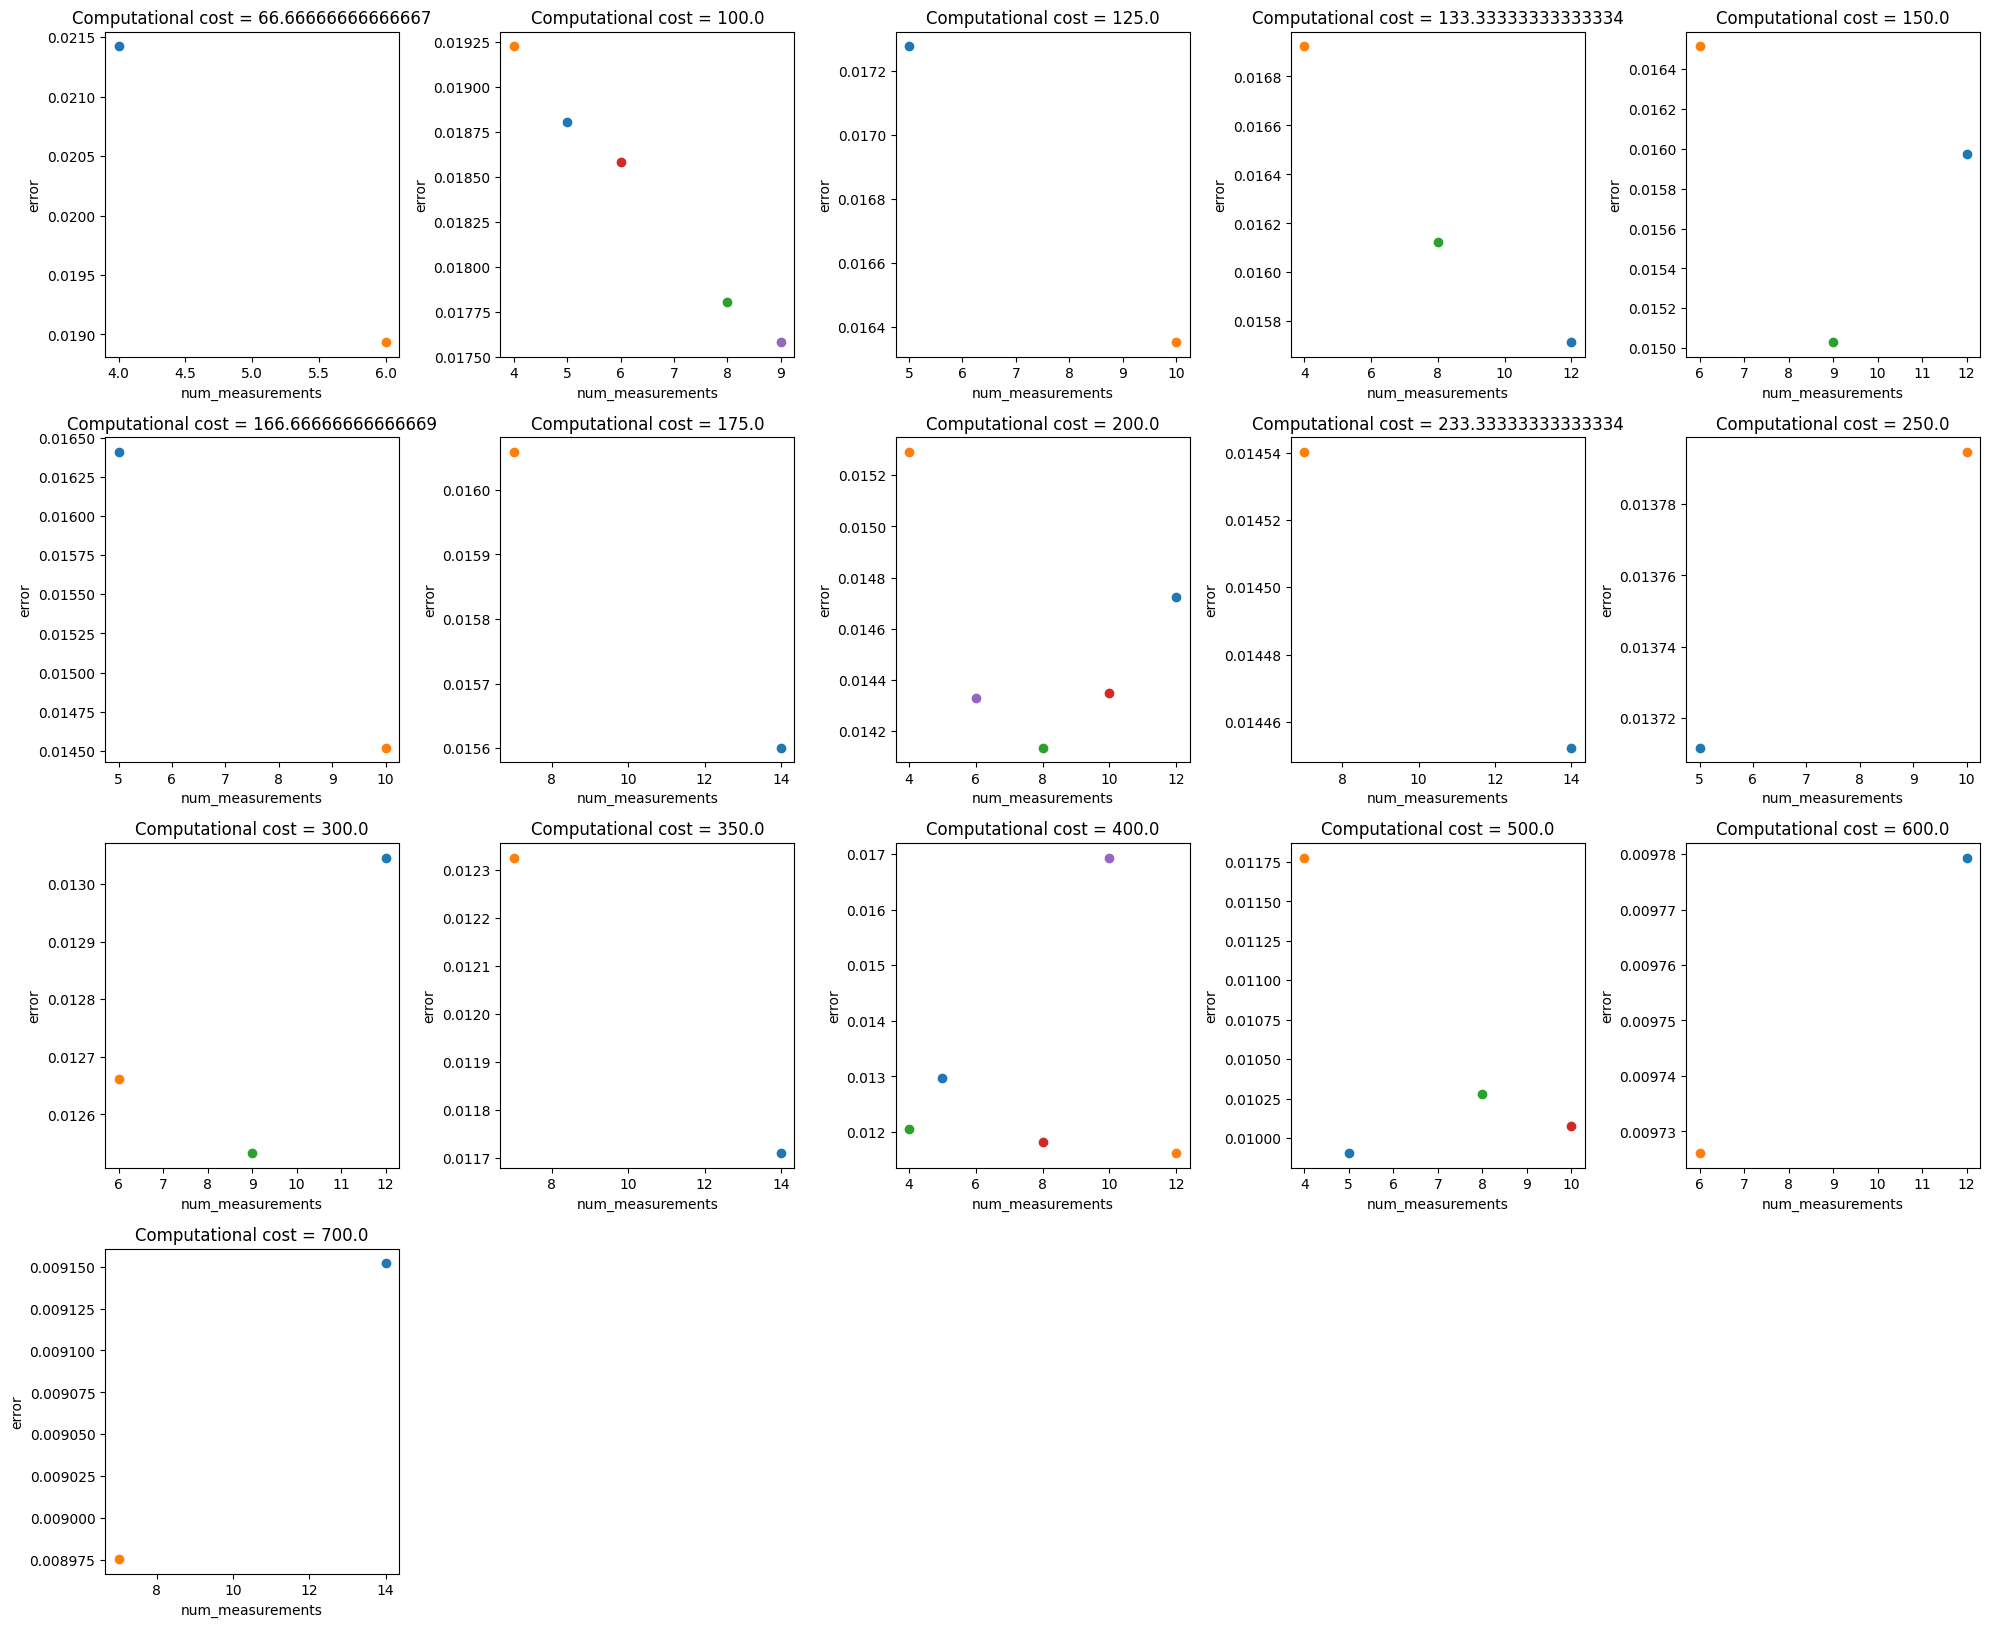

In [3]:
# Assuming computational_cost_to_data is a dictionary with the data
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Sort the computational costs
sorted_costs = sorted(computational_cost_to_data.keys())

idx = 0
for computational_cost in sorted_costs:
    data = computational_cost_to_data[computational_cost]
    if idx >= rows * cols:
        break  # Stop if we have more data than subplots
    if len(data) < 2:
        continue
    for num_measurements, delta_t, error in data:
        axs[idx].scatter(num_measurements, error)
    axs[idx].set_xlabel('num_measurements')
    axs[idx].set_ylabel('error')
    axs[idx].set_title('Computational cost = {}'.format(computational_cost))

    idx += 1

# Hide any unused subplots
for i in range(idx, rows * cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()